In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import classificacao

sns.set_style('darkgrid')
%matplotlib inline

/home/queimadas/.conda/envs/py3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# Configura Modelo e teste com 70%-30%
df = pd.read_csv('conhecimento_filtrado.csv')

df_conhecimento = df[df.verifica.isin([1,3])]
print(df_conhecimento.shape)

# Gera amostra para teste
ids_30 = classificacao.teste_30_ids(df_conhecimento)

teste_original = df_conhecimento[df_conhecimento.id.isin(ids_30)].copy().reset_index(drop=True)
teste = teste_original.copy()
teste['verifica'] = 0
print(len(teste_original))

# Modelo
modelo = df_conhecimento[~df_conhecimento.id.isin(ids_30)].copy()
print(len(modelo))
print(modelo.verifica.value_counts())

(71657, 13)
21497
50160
3    41124
1     9036
Name: verifica, dtype: int64


In [3]:
colunas_stats = ['ndvi', 'nbrl', 'dif_ndvi', 'dif_dnbrl', 'medianb2', 'medianb3', 'medianb4', 'medianb5', 'medianb6', 'medianb7']

In [4]:
y_pred = classificacao.classifica(modelo, teste, colunas_stats)
y_true = teste_original.sort_values('id').reset_index(drop=True)

Criando classificador RF
RF - Classifica dado usando as colunas ['ndvi', 'nbrl', 'dif_ndvi', 'dif_dnbrl', 'medianb2', 'medianb3', 'medianb4', 'medianb5', 'medianb6', 'medianb7']
Classificando com NN
Cria avaliacao usando (RF+NN)/2 - Arredondado para 3 casas decimais


Confusion matrix, without normalization
[[ 3026   831]
 [   15 17625]]
Normalized confusion matrix
[[7.84547576e-01 2.15452424e-01]
 [8.50340136e-04 9.99149660e-01]]


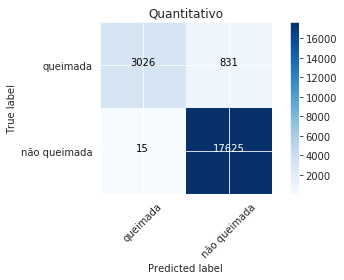

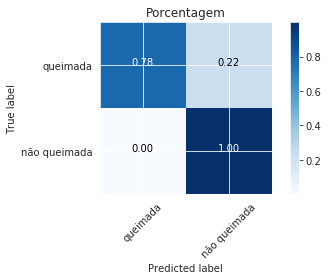

Acertos: 20651/21497 (96%)


In [5]:
classificacao.mostra_resultado(y_pred, y_true)